In [1]:
# Load libraries
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set style (needs to be in a new cell)
set_default()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cpu


### Generate data points in 2D space

In [4]:
X = torch.randn((1000, 2))
X.size()

torch.Size([1000, 2])

In [5]:
colors = X[:, 0]

In [6]:
# Define base vectors
OI = torch.tensor([[0, 0], [0, 0], [1, 0], [0, 1]], dtype=torch.float32)

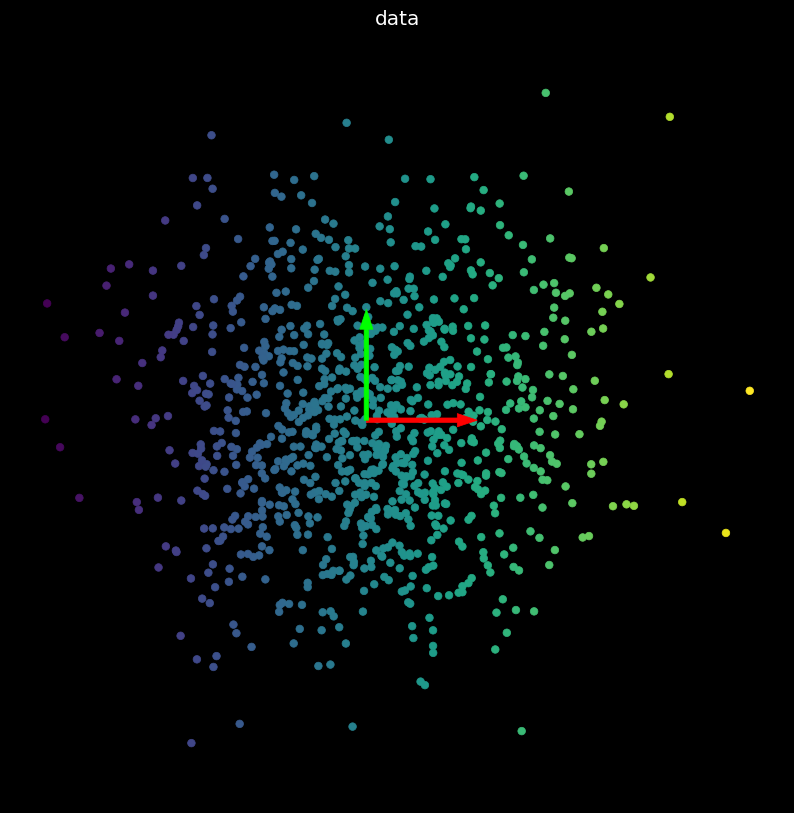

In [7]:
show_scatterplot(X, colors, title='data')
plot_bases(OI)

In [8]:
# Define transformation matrix
W = torch.randn(2, 2)
W

tensor([[ 0.0138,  0.7970],
        [-0.2750, -0.0594]])

In [9]:
# Transform !
Y = X @ W
new_OI = OI @ W

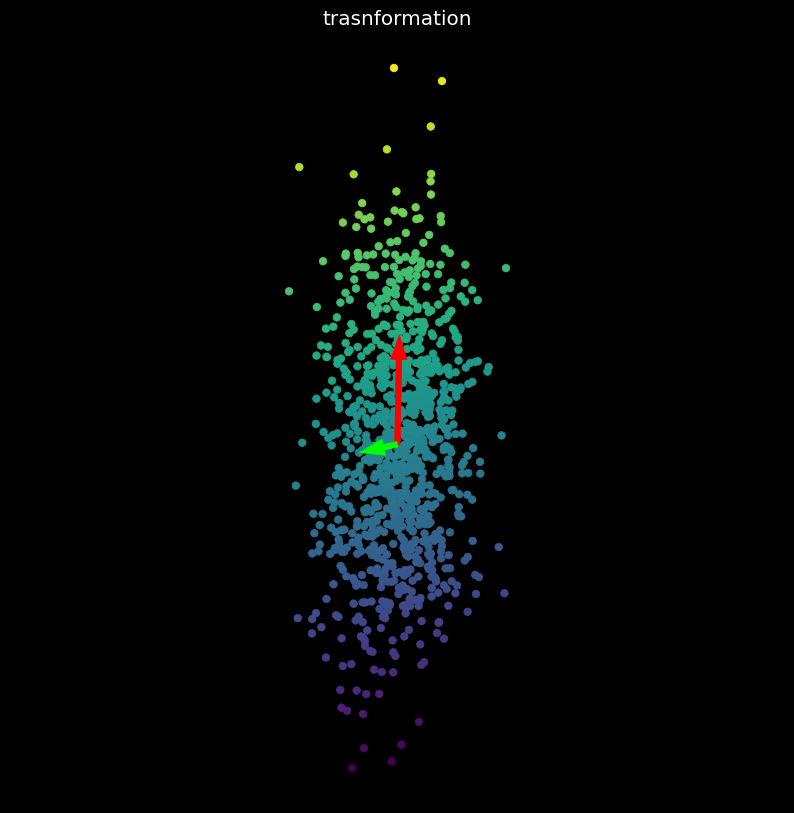

In [10]:
show_scatterplot(Y, colors, title='trasnformation')
plot_bases(new_OI)

### Visualize Linear Transformation

- Generate a random matrix $W$
$$W = U \begin{bmatrix} 
s1 & 0 \\
0 & s2
\end{bmatrix} V^{\top}$$

### Linear Transformation with nn module

$\mathbf{y} = \mathbf{W} \mathbf{x}$

In [11]:
# define linear model
model = nn.Sequential(
    nn.Linear(2, 2)
)

model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
)

In [12]:
# inference
with torch.no_grad():
    Y2 = model(X)
    new_OI2 = model(OI)

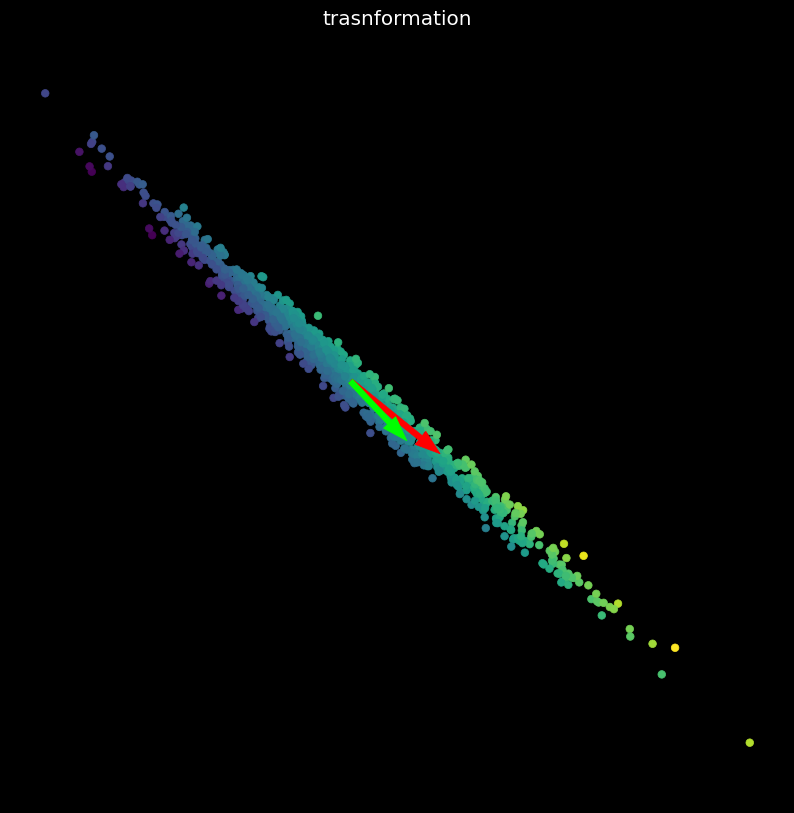

In [13]:
show_scatterplot(Y2, colors, title='trasnformation')
plot_bases(new_OI2)

### Non-linear Transformation

$\mathbf{y} = g(\mathbf{W} \mathbf{x})$

In [14]:
# define non-linear model
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU()
)

model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
)

In [15]:
# # scaling transform
# s = 5
# W = s * torch.eye(2)
# model[0].weight.data.copy_(W)

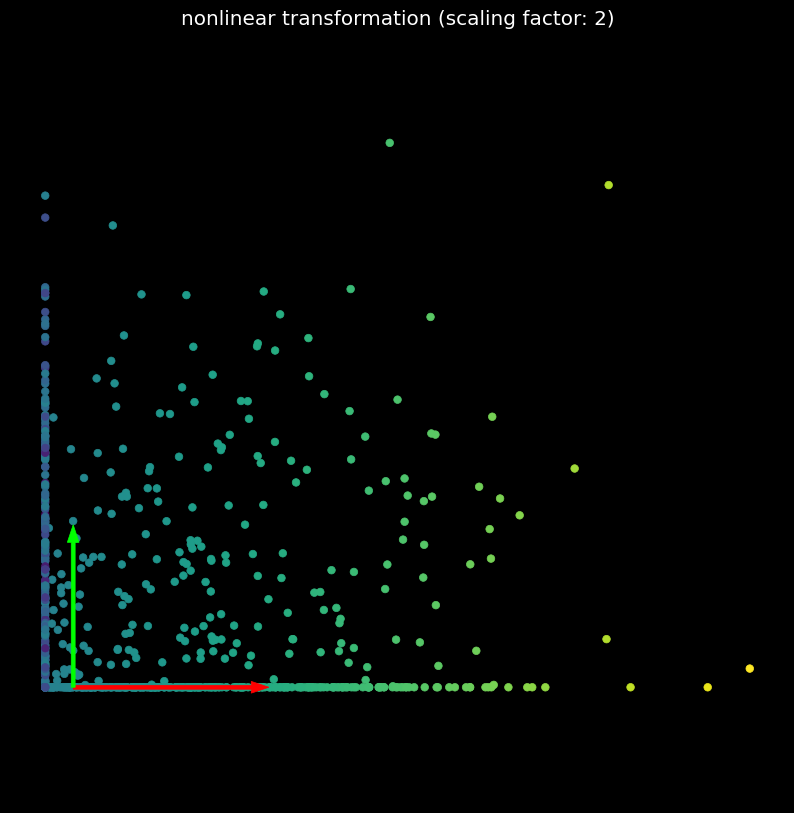

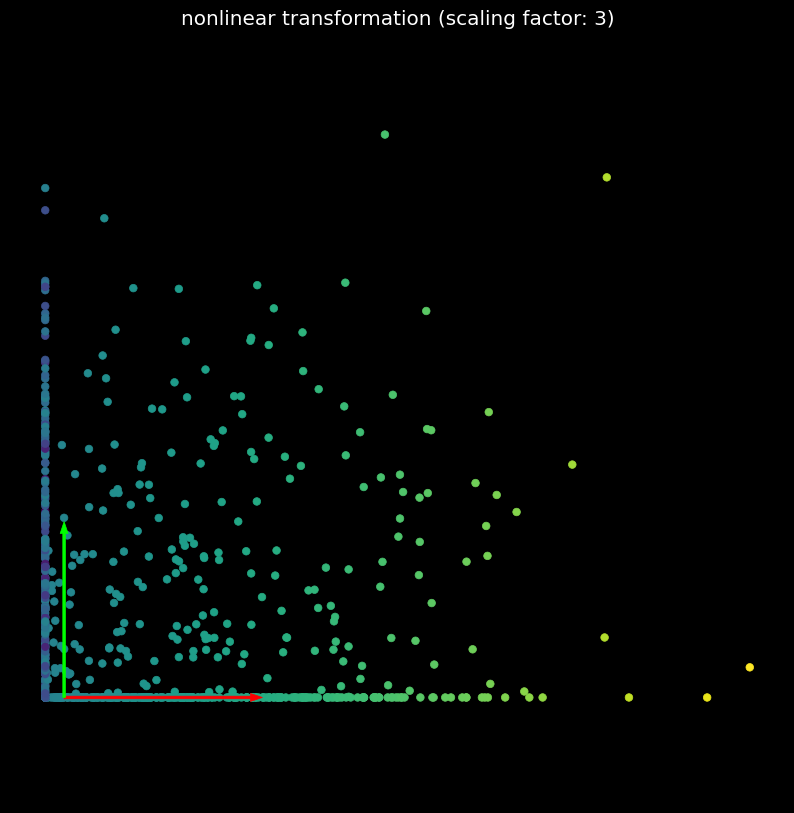

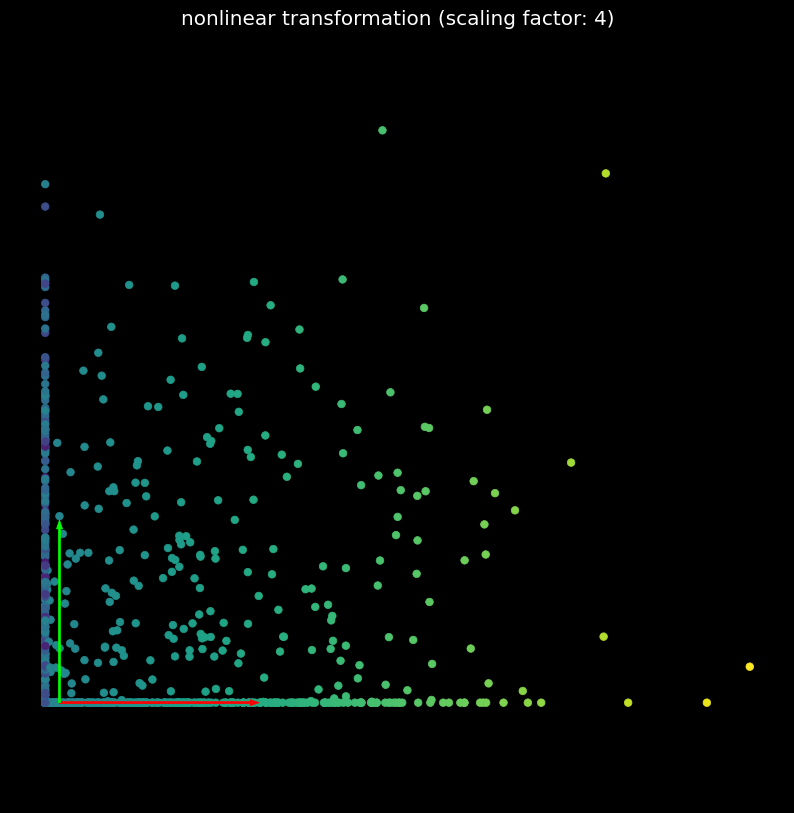

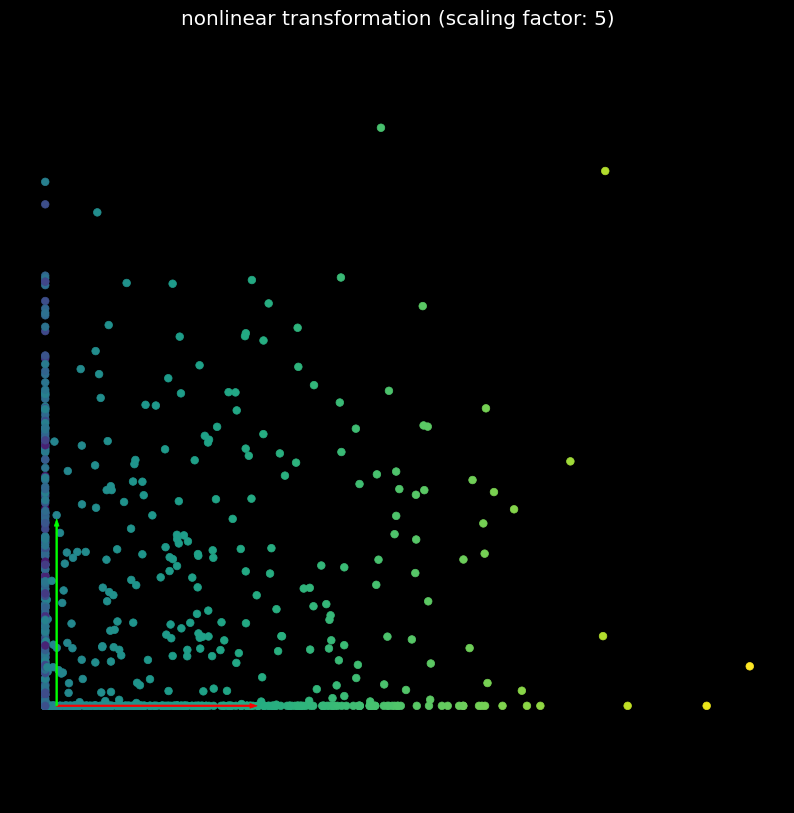

In [16]:
for s in range(2, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)

    # inference
    with torch.no_grad():
        Y3 = model(X)
        new_OI3 = model(OI)

    show_scatterplot(Y3, colors, title='nonlinear transformation (scaling factor: %d)' % s)
    plot_bases(new_OI3)